# <center> Carte et transaction frauduleuse

# 1. Introduction

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
!pip install svm

## 1.1 Les librairies python utilisées dans notre programme

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
from sklearn import metrics

<IPython.core.display.Javascript object>

In [5]:
from sklearn import svm

<IPython.core.display.Javascript object>

In [6]:
#base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Transformateurs de variables
from sklearn.preprocessing import StandardScaler

# Création de pipelines

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline



# model de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import (
    cross_val_score,
    cross_val_predict,
    validation_curve,
    GridSearchCV,
)
#from sklearn.ensemble import GradientBoostingRegressor

#temps
import time


from sklearn.compose import ColumnTransformer

from sklearn.compose import make_column_transformer


<IPython.core.display.Javascript object>

In [7]:
import matplotlib

print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

## 1.2 Les fichiers des données contenus dans le dossier

In [8]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['administratif',
 'ann',
 'BACAR_Maimouna_1_notebook_pretraitement_feature_extraction_faisaibilite_082023.ipynb',
 'CNN',
 'creditcard2023.csv',
 'dataset',
 'desktop.ini',
 'diamant',
 'dvdrental',
 'dvdrental.tar',
 'Face Mask Dataset',
 'Ma musique',
 'mariage',
 'Mes images',
 'Mes vidéos',
 'montre',
 'PRIX telephone',
 'projet 3',
 'projet 4',
 'RIZ',
 'spam',
 'sql learn.sql']

<IPython.core.display.Javascript object>

# 2. Data

## 2.1 Présentation du data

In [9]:
credit = pd.read_csv(path + "creditcard2023.csv")

<IPython.core.display.Javascript object>

In [10]:
credit.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


<IPython.core.display.Javascript object>

In [11]:
print(f"shape : {credit.shape}")
print(f"le nombre de lignes est : {credit.shape[0]}")
print(f"le nombre de colonnes est : {credit.shape[1]}")

shape : (568630, 31)
le nombre de lignes est : 568630
le nombre de colonnes est : 31


<IPython.core.display.Javascript object>

* **id :** Identifiant unique pour chaque transaction
* **V1-V28 :** fonctionnalités anonymisées représentant divers attributs de transaction (par exemple, heure, lieu, etc.)
* **Montant :** Le montant de la transaction
* **Classe :** Libellé binaire indiquant si la transaction est frauduleuse (1) ou non (0)

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

<IPython.core.display.Javascript object>

## 2.2 Colonnes numériques

In [13]:
cols_num_tot = credit.select_dtypes(
    include=np.number
).columns  # les colonnes numériques
cols_num_tot

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<IPython.core.display.Javascript object>

Nous avons ainsi toutes les colonnes numérique affichées ci-dessus.

In [14]:
print(f"il y a {len(cols_num_tot)} colonnes numériques")

il y a 31 colonnes numériques


<IPython.core.display.Javascript object>

## 2.3  credit[ 'Class' ]

In [15]:
credit["Class"].describe()

count    568630.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: Class, dtype: float64

<IPython.core.display.Javascript object>

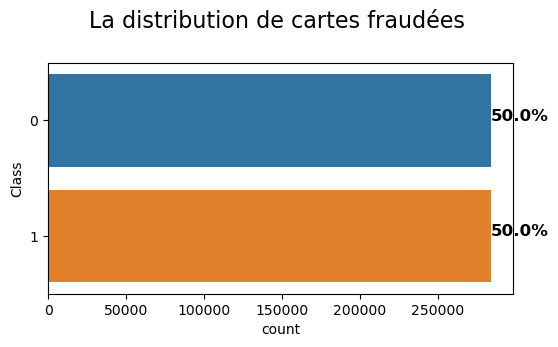

<IPython.core.display.Javascript object>

In [78]:
ax, fig = plt.subplots(figsize=(6, 3))
ax = sns.countplot(y="Class", data=credit)
ax.set_title("La distribution de cartes fraudées \n", fontsize=16)

for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_width() / len(credit.Class))
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=12, fontweight="bold")


# 3. Target et features

## 3.1 Taget :  'credit["Class"]'

Dans ce notebook la valeur à prédire, nommée target, est 'Class'.

In [17]:
Y = credit["Class"]  # target
Y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

<IPython.core.display.Javascript object>

 ## 3.2 Features

Feactures correspondent aux variables permettant de prédire le target.

In [18]:
credit.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<IPython.core.display.Javascript object>

Tout d'abord nous allons créer une liste des features

In [19]:
# liste des features
colonne_feature = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "Amount",
]
colonne_feature

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

<IPython.core.display.Javascript object>

Ensuite nous réaliserons un dataframe X avec les colonnes de notre liste 'colonne_feature' à partir du dataframe credit

In [20]:
# dataframe des features
X = credit[colonne_feature]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


<IPython.core.display.Javascript object>

In [21]:
# Standariser
preprocessor = make_column_transformer((StandardScaler(), colonne_feature))

<IPython.core.display.Javascript object>

# 4. Différentes variables X_train, X_test, Y_train, Y_test

## 4.1 Définir les variables

il est nécessaire d'utiliser des differentes variable pour une prédiction. Afin de facilité la lecture de la pédiction on explicitera les termes. 



X_train : correspond à Features engineering d'entrainement 

X_test : correspond à Features engineering du test 

y_train : correspond à taget d'entrainement  


y_test :correspond à Features engineering d'entrainementaget du test 

## 4.2 Sélectionner les variables apprentissage et test

Nous devons séparer les variables d'apprentissage de celles du test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(
    "Entrainement: {} lignes,\nTest: {} lignes.\n".format(
        X_train.shape[0], X_test.shape[0]
    )
)

Entrainement: 454904 lignes,
Test: 113726 lignes.



<IPython.core.display.Javascript object>

# 5. Modèles potentiels pour Machine learning sans GridSearch

## 5.1 RandomForestClassifier()

In [23]:
# RandomForestClassifier
model = make_pipeline(preprocessor, RandomForestClassifier())  # le modèle
model.fit(X_train, y_train)  # entrainement
y_pred = model.predict(X_test)  # prediction

<IPython.core.display.Javascript object>

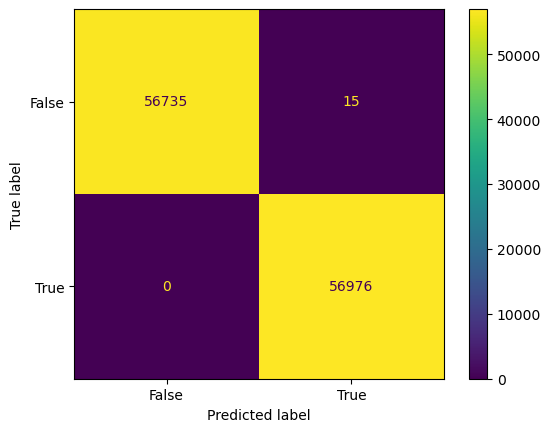

<IPython.core.display.Javascript object>

In [24]:
# Matrice de confusion
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)

cm_display.plot()

D'après la matrice de confusion le modèle est assez bon avec moins de 20 valeurs dans la mauvaise classe. En effet il y a 15 cartes piratées qui sont considérées comme non. 

## 5.2 Les différents modèles

Tout d'abord nous allons créer un dictionnaire contenant tous les modèles.  

### 5.2.1 les modèles

Il existe de nombreux modèles, dans notre projet nous utiliserons les suivants; RandomForestClassifier, KNeighborsClassifier, LogisticRegression, SVC

In [25]:
# création d'un dictionnaire de modèle
algos = {
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": svm.SVC(),
}

<IPython.core.display.Javascript object>

### 5.2.2 La prédiction

Ensuite nous créerons une liste *results* où nous mettrons nos résultats c'est à dire le nom du modèle, l'accuracy et le temps d'exécution du modèle.

In [26]:
results = []  # création d'une liste

<IPython.core.display.Javascript object>

Maintenant nous pouvons réaliser notre prédiction.

In [27]:
from sklearn.metrics import *

<IPython.core.display.Javascript object>

In [28]:
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [29]:
y = ["Class"]  # la valeur à prédire, target

for nom_algo, algo in algos.items():  # parcourir dictionnaire
    print(f"Algorithme: {nom_algo}")  # nom du modèle
    for i in y:
        start = time.time()
        model = make_pipeline(preprocessor, algo)  # le modèle
        model.fit(X_train, y_train)  # entrainement
        y_pred = model.predict(X_test)  # prediction
        accuracy = accuracy_score(y_test, y_pred)

        print(metrics.classification_report(y_test, y_pred))
        end = time.time()
        temps = round(end - start, 3)  # la durée d'entrainement en secondes
        print(temps)

        print("-" * 100)  # la séparation

        results.append([nom_algo, accuracy, temps])  # liste regroupant les données

Algorithme: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

1073.688
----------------------------------------------------------------------------------------------------
Algorithme: KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

135.019
----------------------------------------------------------------------------------------------------
Algorithme: LogisticRegression
              precision    r

<IPython.core.display.Javascript object>

### 5.2.3. La valeur accuracy_score et le temps d'excusion

Il serait préférable de mettre tous nos résultats sous forme de dataframe.

In [30]:
# liste des nom des colonnes du futur dataFrame
colonnes_resultats = ["algorithme", "accuracy", "temps"]
# DataFrame regroupent les resultats des modèle
df_results = pd.DataFrame(results, columns=colonnes_resultats)
display(df_results.sort_values(by=["accuracy"], ascending=False))

,algorithme,accuracy,temps
0,RandomForestClassifier,0.999877,1073.688
1,KNeighborsClassifier,0.997819,135.019
3,SVM,0.996852,1072.795
2,LogisticRegression,0.965276,3.888


<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

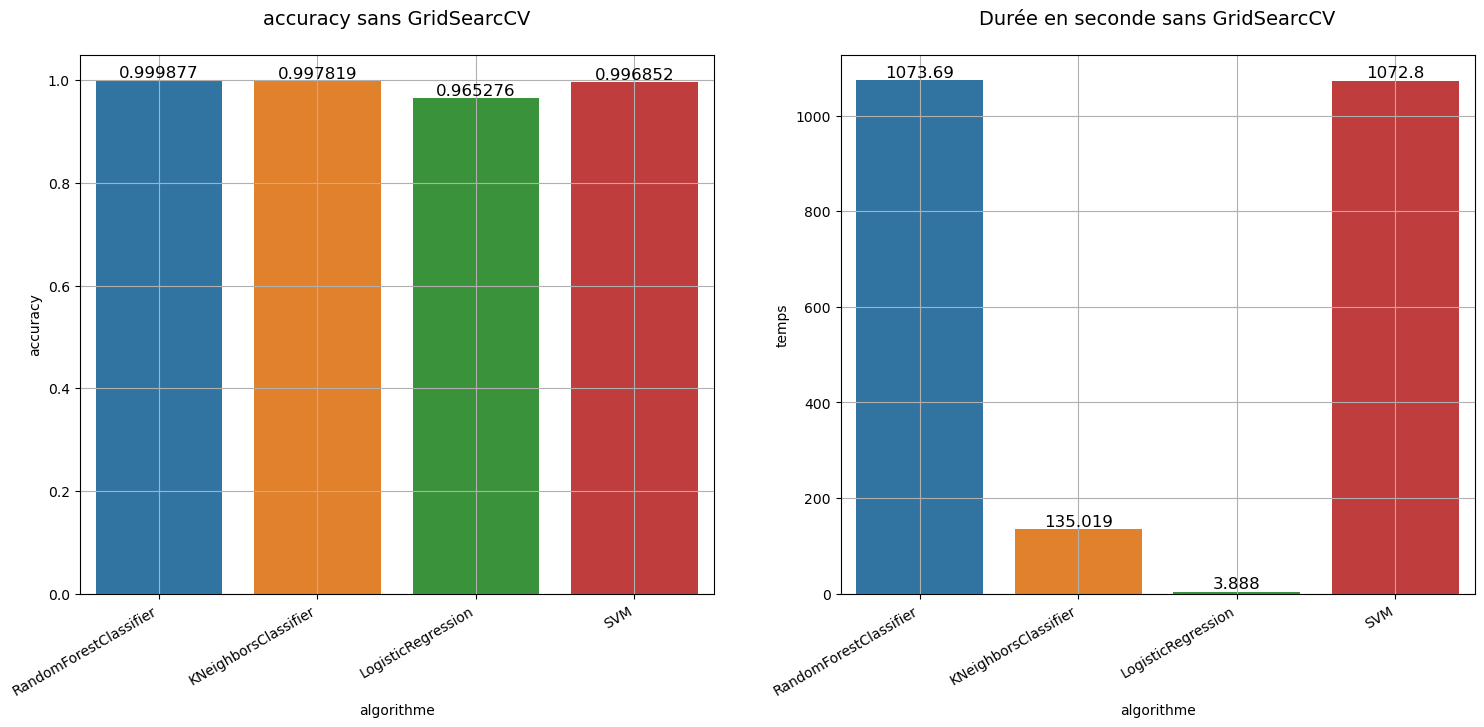

<IPython.core.display.Javascript object>

In [31]:
#
plt.figure(figsize=(12, 8))

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# accuracy sans GridSearcCV
acc = sns.barplot(x="algorithme", y="accuracy", data=df_results, ax=axs[0])
acc.bar_label(acc.containers[0], fontsize=12)

# Durée sans GridSearcCV
duree = sns.barplot(x="algorithme", y="temps", data=df_results, ax=axs[1])
duree.bar_label(duree.containers[0], fontsize=12)

ax1 = axs[0]
ax2 = axs[1]

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")


axs[0].grid()
axs[1].grid()

axs[0].set_title("accuracy sans GridSearcCV\n", fontsize=14)
axs[1].set_title("Durée en seconde sans GridSearcCV\n", fontsize=14)

plt.show()

### 5.2.4 La matrice de confusion pour les 2 meilleurs modèles

Les 2 meilleurs modèles sont RandomForestClassifier et KNeighborsClassifier

### RandomForestClassifier

In [32]:
# RandomForestClassifier
modelrf = make_pipeline(preprocessor, RandomForestClassifier())  # le modèle
modelrf.fit(X_train, y_train)  # entrainement
y_predrf = modelrf.predict(X_test)  # prediction

<IPython.core.display.Javascript object>

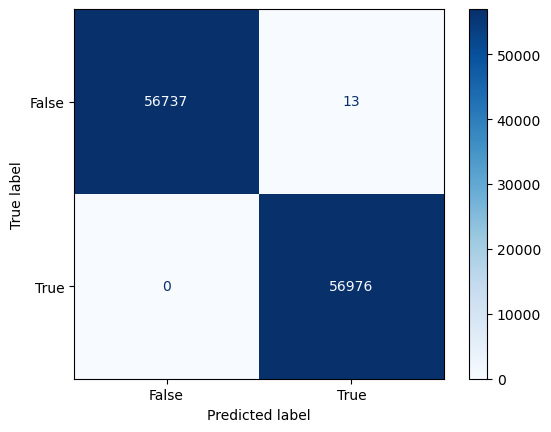

<IPython.core.display.Javascript object>

In [33]:
# Matrice de confusion de RandomForestClassifier
confusion_matrix = metrics.confusion_matrix(y_test, y_predrf)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

### KNeighborsClassifier

In [34]:
# KNeighborsClassifier
modelkn = make_pipeline(preprocessor, KNeighborsClassifier())  # le modèle
modelkn.fit(X_train, y_train)  # entrainement
y_predkn = modelkn.predict(X_test)  # prediction

<IPython.core.display.Javascript object>

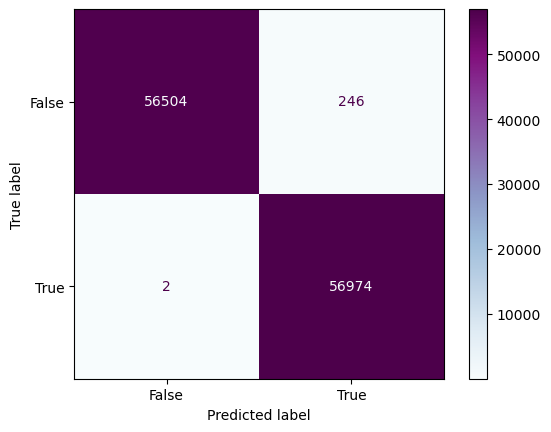

<IPython.core.display.Javascript object>

In [73]:
# Matrice de confusion de KNeighborsClassifier
confusion_matrix2 = metrics.confusion_matrix(y_test, y_predkn)

cm_display2 = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix2, display_labels=[False, True]
)

cm_display2.plot(cmap=plt.cm.BuPu)
plt.show()

# 6. Meilleurs paramètres des modèles RandomForestClassifier et KNeighborsClassifier GridSearch

## 6.1  RandomForestClassifier

### 6.1.1 les hyperparamètres RandomForestClassifier

Nous allons afficher tous les hyperparamètres de chacun de nos modèles.

In [36]:
paramsRamF = (
    RandomForestClassifier().get_params()
)  # les parametres RandomForestClassifier
print("Algorithme: RandomForestClassifier\n")
print(f" les parametres :{paramsRamF} \n ")
print("-" * 100)  # la séparation

Algorithme: RandomForestClassifier

 les parametres :{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
 
----------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [42]:
params_RandomForestClassifier = {
    "randomforestclassifier__n_estimators": [100, 200],
    "randomforestclassifier__min_samples_leaf": [1, 2],
}

<IPython.core.display.Javascript object>

### 6.1.2 les GridSearchCV avec RandomForestClassifier

In [43]:
model_RF = make_pipeline(preprocessor, RandomForestClassifier())  # modèle
params = params_RandomForestClassifier  # hyperparamètres

<IPython.core.display.Javascript object>

In [44]:
# Gridsearch
grid_model = GridSearchCV(model_RF, params, cv=5, scoring="precision")

<IPython.core.display.Javascript object>

In [ ]:
grid_model.fit(X_train, y_train)

In [48]:
best_para = grid_model.best_params_  # meilleur hyperparametre RandomForestClassifier
best_score = grid_model.best_score_  # meilleur score RandomForestClassifier

<IPython.core.display.Javascript object>

In [49]:
print(
    f" Algorithme :RandomForestClassifier \n Best paramètre :{ best_para} \n score :{ best_score} \n  "
)

 Algorithme :RandomForestClassifier 
 Best paramètre :{'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 200} 
 score :0.9997185662115449 
  


<IPython.core.display.Javascript object>

### 6.1.3 Matrice de confusion avec RandomForestClassifier

In [53]:
modelRF1 = make_pipeline(
    preprocessor, RandomForestClassifier(min_samples_leaf=1, n_estimators=200)
)  # le modèle
modelRF1.fit(X_train, y_train)  # entrainement
y_predRF1 = modelRF1.predict(X_test)  # prediction

<IPython.core.display.Javascript object>

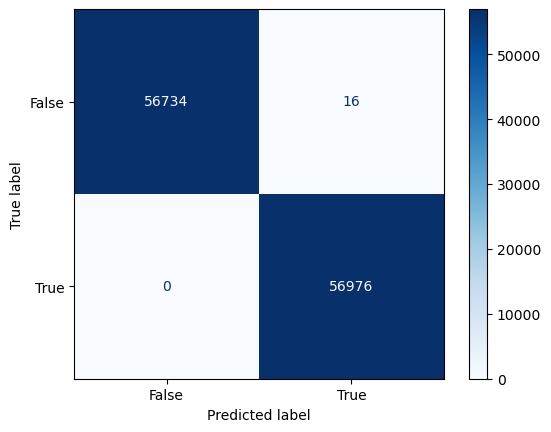

<IPython.core.display.Javascript object>

In [54]:
# Matrice de confusion de RandomForestClassifier
confusion_matrix1grid = metrics.confusion_matrix(y_test, y_predRF1)

cm_display1grid = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1grid, display_labels=[False, True]
)

cm_display1grid.plot(cmap=plt.cm.Blues)
plt.show()

## 6.2 KNeighborsClassifier()

### 6.2.1 les hyperparamètres KNeighborsClassifier

In [55]:
paramsKN = KNeighborsClassifier().get_params()  # les parametres KNeighborsClassifier
print("Algorithme: RandomForestClassifier\n")
print(f" les parametres :{paramsKN} \n ")
print("-" * 100)  # la séparation

Algorithme: RandomForestClassifier

 les parametres :{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'} 
 
----------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [56]:
params_KNeighborsClassifier = {
    "kneighborsclassifier__n_neighbors": [3, 5, 7],
    "kneighborsclassifier__weights": ["uniform", "distance"],
}

<IPython.core.display.Javascript object>

### 6.2.2 les GridSearchCV avec KNeighborsClassifier

In [57]:
model_KN = make_pipeline(preprocessor, KNeighborsClassifier())  # modèle
params2 = params_KNeighborsClassifier  # hyperparamètres

<IPython.core.display.Javascript object>

In [58]:
# Gridsearch
grid_model2 = GridSearchCV(model_KN, params2, cv=5, scoring="precision")

<IPython.core.display.Javascript object>

In [59]:
grid_model2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['V1',
                                                                          'V2',
                                                                          'V3',
                                                                          'V4',
                                                                          'V5',
                                                                          'V6',
                                                                          'V7',
                                                                          'V8',
                                                                          'V9',
                                                                          'V10',
                                                                          'V11',
                                                                          'V12',
                                                                          'V13',
                                                                          'V14',
                                                                          'V15',
                                                                          'V16',
                                                                          'V17',
                                                                          'V18',
                                                                          'V19',
                                                                          'V20',
                                                                          'V21',
                                                                          'V22',
                                                                          'V23',
                                                                          'V24',
                                                                          'V25',
                                                                          'V26',
                                                                          'V27',
                                                                          'V28',
                                                                          'Amount'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='precision')

<IPython.core.display.Javascript object>

In [62]:
best_para2 = grid_model2.best_params_  # meilleur hyperparametre KNeighborsClassifier
best_score2 = grid_model2.best_score_  # meilleur score KNeighborsClassifier

<IPython.core.display.Javascript object>

In [63]:
print(
    f" Algorithme : KNeighborsClassifier \n Best paramètre :{ best_para2} \n score :{ best_score2} \n  "
)

 Algorithme : KNeighborsClassifier 
 Best paramètre :{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'} 
 score :0.9966768570115514 
  


<IPython.core.display.Javascript object>

In [64]:
# model avec les meilleurs hyperparamètres
model_KN_best = make_pipeline(
    preprocessor, KNeighborsClassifier(n_neighbors=3, weights="distance")
)  # modèle

<IPython.core.display.Javascript object>

In [65]:
model_KN_best.fit(X_train, y_train)  # entrainement
y_predKN2 = model_KN_best.predict(X_test)  # prediction

<IPython.core.display.Javascript object>

### 6.2.3 Matrice de confusion avec KNeighborsClassifier

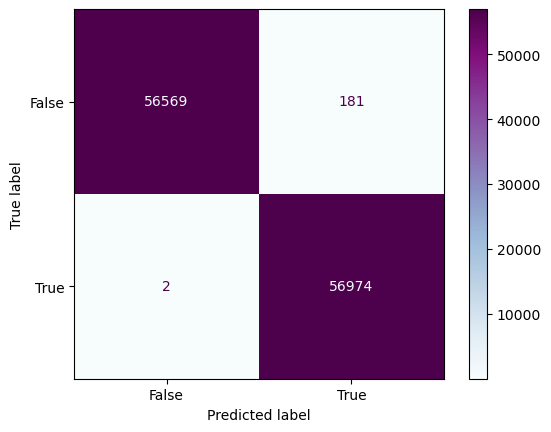

<IPython.core.display.Javascript object>

In [72]:
# Matrice de confusion de KNeighborsClassifier
confusion_matrix2grid = metrics.confusion_matrix(y_test, y_predKN2)

cm_display2grid = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix2grid, display_labels=[False, True]
)

cm_display2grid.plot(cmap=plt.cm.BuPu)
plt.show()

# Conclusion

Le meilleur modèle est RandomForestClassifier avec un score supérieur à 0,9997. Cependant le temps d'exécution est très lente, il faut compter au moins une journée.